In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [5]:
df=pd.read_csv('C:/Users/User/Desktop/ml Assi/diabetes.csv')


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Getting X and y

In [9]:
X=df.iloc[:,0:8]
y=df.Outcome

In [11]:
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (768, 8)
y shape: (768,)


# Standardisation

In [13]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)


In [14]:
X_std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Separate into training and testing

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=0)

print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)

print()
print('X_test shape',X_test.shape)
print('y_test= shape',y_test.shape)

X_train shape (537, 8)
y_train shape (537,)

X_test shape (231, 8)
y_test= shape (231,)


# Importing Naive bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
bayes=GaussianNB()

# model fitting

In [20]:
bayes.fit(X_train,y_train)

GaussianNB()

# Score of training and testing

In [21]:
bayes.score(X_train,y_train)

0.7672253258845437

In [22]:
bayes.score(X_test,y_test)

0.7619047619047619

# Accuracy score

In [28]:
y_pred=bayes.predict(X_test)
acc_score=accuracy_score(y_test, y_pred)
acc_score

0.7619047619047619

# Confusion Matrix

In [29]:
cm=confusion_matrix(y_test,y_pred)

In [30]:
cm

array([[138,  19],
       [ 36,  38]], dtype=int64)

# Classification Report

In [34]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



# Confusion matrix plot

C:\Users\User\anaconda3\envs\mlcl\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


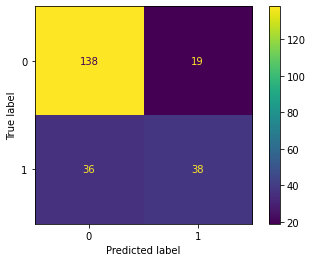

In [35]:
plot_confusion_matrix(bayes,X_test,Y_test)
import matplotlib.pyplot as plt
plt.show()